In [38]:
import pandas as pd
import numpy as np
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [39]:
from pytesseract import Output
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

In [40]:
from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd=R'C:\Program Files\Tesseract-OCR\tesseract'

In [41]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [42]:
train_df

,img_path,text
0,./train/train_00001.png,골목미용실
1,./train/train_00002.png,한성부동산
2,./train/train_00003.png,홍라운지
3,./train/train_00004.png,모단걸응접실
4,./train/train_00005.png,씨앗양식
...,...,...
12154,./train/train_12161.png,넬슨
12155,./train/train_12162.png,앤드루 램버트 지음
12156,./train/train_12163.png,박아람 옮김
12157,./train/train_12164.png,판결의


In [52]:
img_path=train_df['img_path'].values[1]
img_path

'./train/train_00002.png'

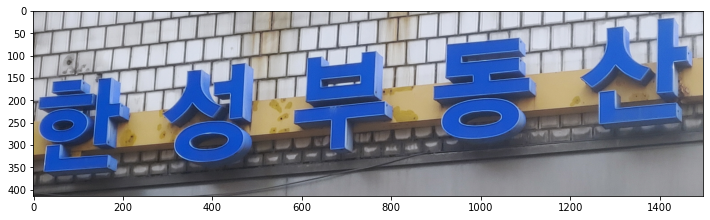

In [53]:
img=cv2.imread(img_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,10))
plt.imshow(img, cmap='gray')

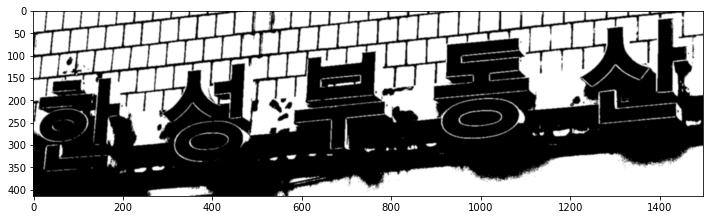

In [54]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
gray=cv2.GaussianBlur(gray, ksize=(5,5), sigmaX=0)

plt.figure(figsize=(12,10))
plt.imshow(gray, cmap='gray')
#img_thresh=cv2.adaptiveThreshold(img_blurred, maxValue=255.0, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv2.THRESH_BINARY_INV, blockSize=19, C=9)

#plt.figure(figsize=(12,10))
#plt.imshow(img_thresh, cmap='gray')

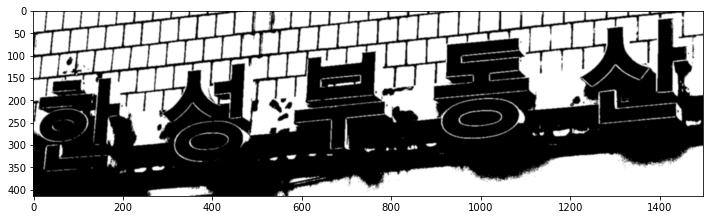

In [55]:
#norm_img=np.zeros((img.shape[0], img.shape[1]))
#img=cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
#img=cv2.GaussianBlur(img, (1,1), 0)
#img=cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(12,10))
plt.imshow(gray, cmap='gray')

In [49]:
config = ('-l kor --oem 3 --psm 4')
# config = ('-l kor --oem 3 --psm 4')

string = pytesseract.image_to_string(gray, config=config)
text=string

In [50]:
preds=[]
text = text.replace('\n', '')
text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', text)
text = text.strip()
preds.append(text)

In [51]:
preds

['']

In [9]:
train_df['img_path'].values[0:4]

array(['./train/train_00001.png', './train/train_00002.png',
       './train/train_00003.png', './train/train_00004.png'], dtype=object)

In [ ]:
train_df